# Matrix de confusão

###Analise de matriz de confusão

In [1]:
library(FNN)

In [2]:
hbat <- read.csv(file = '../../data/HBAT.csv');

In [3]:
head(hbat)

,X,id,x1,x2,x3,x4,x5,x6,x7,x8,⋯,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,1 to 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,8.5,3.9,2.5,⋯,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,"Yes, would consider"
2,2,2,Over 5 years,Newsprint industry,Small (0 to 499),USA/North America,Indirect through broker,8.2,2.7,5.1,⋯,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,"No, would not consider"
3,3,3,Over 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,9.2,3.4,5.6,⋯,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,"Yes, would consider"
4,4,4,Less than 1 year,Newsprint industry,Large (500+),Outside North America,Indirect through broker,6.4,3.3,7.0,⋯,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,"No, would not consider"
5,5,5,1 to 5 years,Magazine industry,Large (500+),USA/North America,Direct to customer,9.0,3.4,5.2,⋯,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,"No, would not consider"
6,6,6,Less than 1 year,Newsprint industry,Small (0 to 499),Outside North America,Indirect through broker,6.5,2.8,3.1,⋯,5.1,9.5,3.6,4.7,3.3,4.7,6.3,6.1,50.1,"No, would not consider"


### Criando alias para as colunas da base

In [4]:
set.seed(123)

In [5]:
attach(hbat)

### Rodando KNN com variação

In [6]:
index <- sample(1:nrow(hbat), 80)

In [7]:
train.x <- hbat[index, 8:20]

In [8]:
test.x <- hbat[-index, 8:20]

In [9]:
train.y <- hbat[index, 25]

In [10]:
test.y <- hbat[-index, 25]

In [11]:
error <- vector("numeric", 50)


for (i in 1:50) {
    knn.previsto <- knn(train.x, test.x, train.y, i)
    error[i] <- 1-mean(knn.previsto==test.y)
    table(test.y, knn.previsto)
}

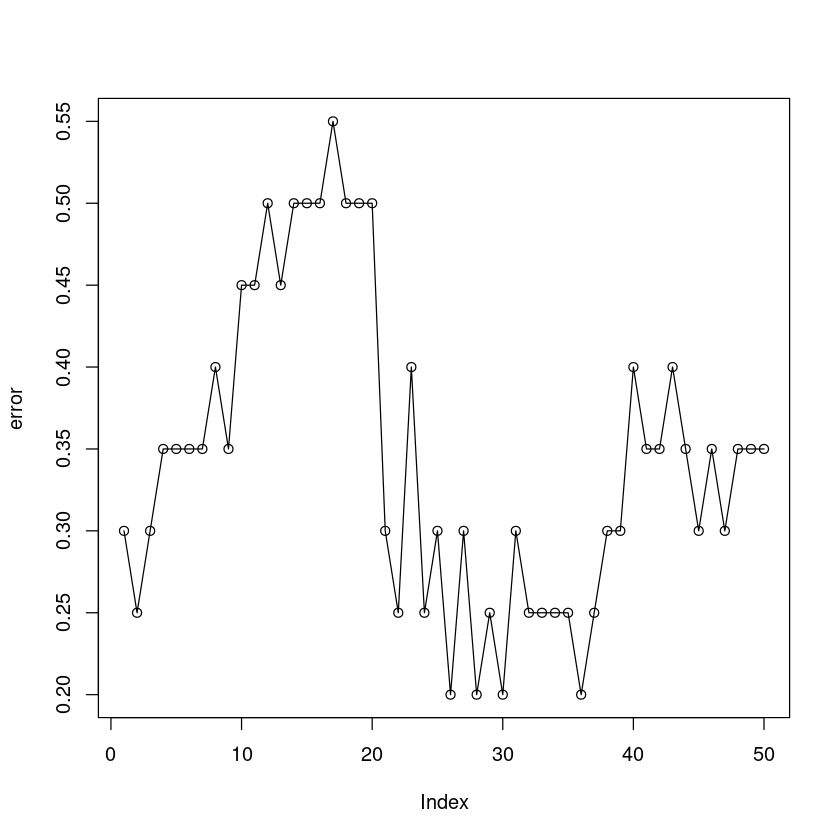

In [12]:
plot(error, type='o')

## Matriz de confusão

In [15]:
confusion <- table(test.y, knn.previsto)

In [17]:
confusion

                        knn.previsto
test.y                   No, would not consider Yes, would consider
  No, would not consider                      8                   5
  Yes, would consider                         2                   5

In [18]:
trueNegative <- confusion[1, 1]

In [19]:
falsePositive <- confusion[1, 2]

In [20]:
falseNegative <- confusion[2, 1]

In [21]:
truePositive <- confusion[2, 2]

### Analise de precisão

In [25]:
precision <- truePositive / (truePositive + falsePositive)

In [26]:
precision

[1] 0.5

## Analise de precisão para k variantes

In [30]:
error <- vector("numeric", 50)
precision <- vector("numeric", 50)

for (i in 1:50) {
    knn.previsto <- knn(train.x, test.x, train.y, i)
    error[i] <- 1-mean(knn.previsto==test.y)
    # Real primeiro ...
    # Previsto depois ...
    confusion <- table(test.y, knn.previsto)
    
    trueNegative <- confusion[1, 1]
    falsePositive <- confusion[1, 2]
    falseNegative <- confusion[2, 1]
    truePositive <- confusion[2, 2]
    precision[i] <- truePositive / (truePositive + falsePositive)
}

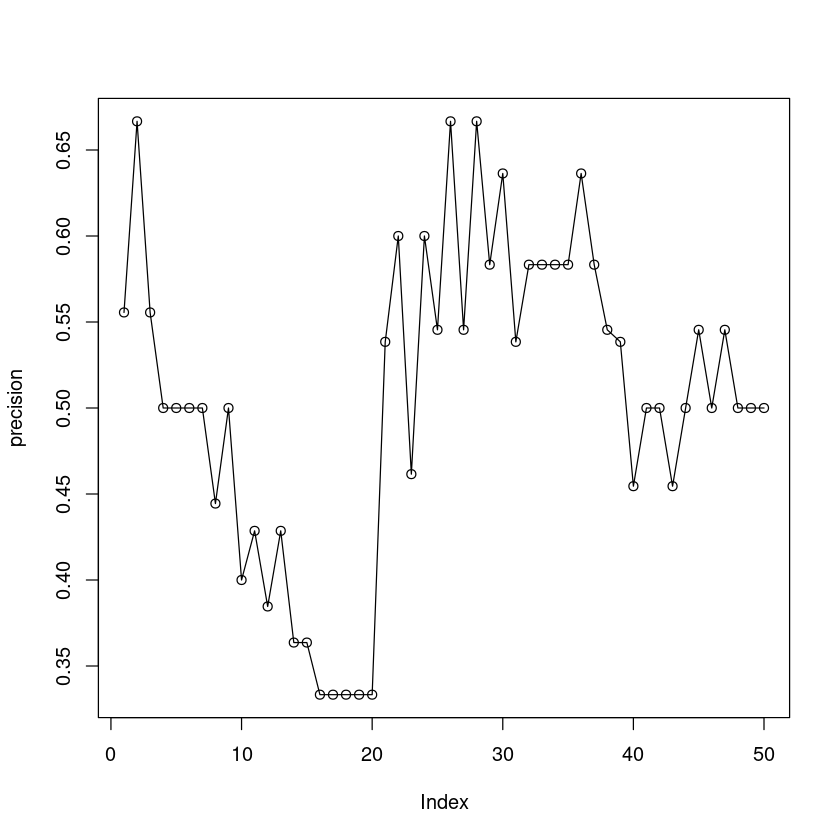

In [31]:
plot(precision, type='o')

## modelo com mais precisão

In [33]:
max(which(precision==max(precision))) # 28-NN

[1] 28